<a href="https://colab.research.google.com/github/hwarang97/Image_classification/blob/main/pytorch_(dataset%2CDataLoader).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 샘플을 처리하는 코드는 지저분하고 유지보수가 어렵울 수 있습니다.
# 가독성을 높이고, 유지관리하기 쉽게 만들기 위해서 
# 샘플 처리 부분과 모델 학습 부분을 나누는 것이 이상적입니다.


# utility = usefulness
# torch.utils.data.DataLoader : 데이터를 쉽게 접근할 수 있도록 iterable 객체로 감싼다
# torch.utils.data.Dataset    : 기본적으로 제공되는 데이터 및 사용자의 데이터를 사용할 수 있도록 도와줌

### 새로운 용어
- prototype : 모델을 만들어보기(시범용)
- benchmark : 성능측정

### 데이터셋(FashionMNIST)을 불러올 때 사용되는 매개변수
- root : 학습/테스트 데이터가 저장되는 경로
- train : 학습용 또는 데스트용 데이터셋 여부를 지정 
- download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드합니다
- transform 과 target_transform은 특징과 정답 변형을 지정합니다

### 데이터셋을 불러오기

In [2]:
import torch
from torch.utils.data import Dataset           # 기본적으로 제공되는 데이터를 불러오기 위해서 사용
from torchvision import datasets
from torchvision.transforms import ToTensor    # 이미지, 넘파이 객체를 tensor 객체로 변환하는 함수
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data',
    train=True,      # True : 학습용 데이터를 불러오기
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,     # False : 테스트용 데이터를 불러오기
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 데이터셋을 순회하고 시각화하기

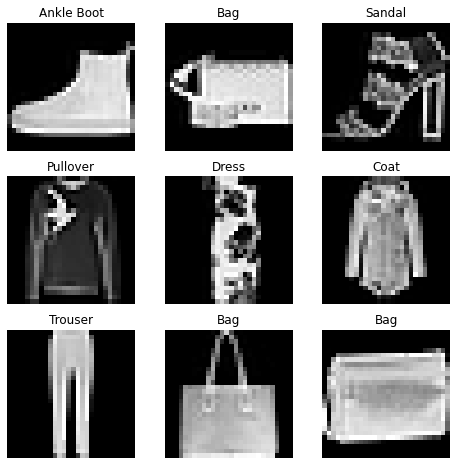

In [3]:
# 데이터를 list처럼 index를 통해서 접근할 수 있음
# matplob을 이용해서 데이터 일부를 시각화해보기

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item() # 0 ~ 60000 사이의 정수를 텐서에 담아서 출력 -> item에 의해서 텐서의 내용물인 랜덤수가 출력
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### 파일에서 사용자 정의 데이터셋 만들기

In [ ]:
# 사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 함 ( __init__, __len__, __getitem__)

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label
